In [319]:
import pandas as pandas
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [320]:
df=pd.read_csv("cities_r2.csv")
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [321]:
df.isna().sum()

,0
name_of_city,0
state_code,0
state_name,0
dist_code,0
population_total,0
population_male,0
population_female,0
0-6_population_total,0
0-6_population_male,0
0-6_population_female,0


In [322]:
le=LabelEncoder()
for col in df.columns:
  if (df[col].dtypes=="O"):
    df[col]=le.fit_transform(df[col])

In [323]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,455,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,154,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,116,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,215,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,66,11902,7871,4031


In [324]:
X=df[["effective_literacy_rate_total"]]

In [325]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

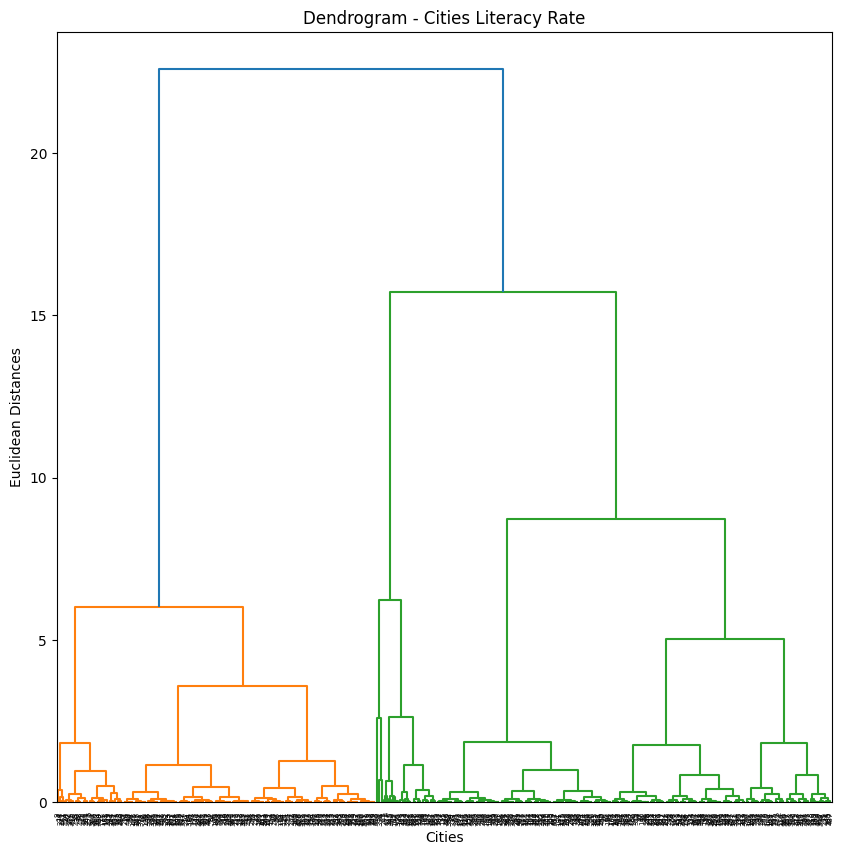

In [326]:
plt.figure(figsize=(10,10))
dendrogram(linkage(X_scaled,method="ward"))
plt.xlabel("Cities")
plt.ylabel("Euclidean Distances")
plt.title('Dendrogram - Cities Literacy Rate')
plt.show()

In [327]:
model=AgglomerativeClustering(n_clusters=5,linkage="ward")
df["Cluster"]=model.fit_predict(X_scaled)

In [328]:
df[["effective_literacy_rate_total","Cluster"]]

,effective_literacy_rate_total,Cluster
0,79.86,2
1,91.99,0
2,80.51,2
3,83.46,2
4,68.38,1
...,...,...
488,81.85,2
489,84.16,3
490,94.05,0
491,85.91,3


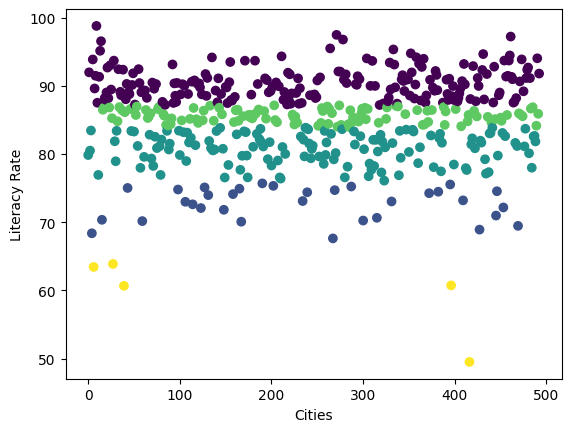

In [329]:
plt.scatter(df.index,df["effective_literacy_rate_total"],c=df["Cluster"])
plt.xlabel("Cities")
plt.ylabel("Literacy Rate")
plt.show()